In [49]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
    
means_kriging_OP=pd.read_csv('/Users/DMac/OneDrive/MasterThesis/data/means-kriging-diff_T-withOP.csv', sep=';')

In [50]:
means_kriging_OP

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1860,1.24,1.32,2.24,1.79,1.60,1.15,1.06,1.19,1.52,1.54,1.35,0.78
1,1861,1.70,0.77,1.32,1.63,1.14,1.02,1.15,1.55,1.60,1.17,1.04,1.79
2,1862,1.90,2.56,1.90,1.99,1.01,0.99,1.54,1.11,1.35,1.02,0.75,2.70
3,1863,1.04,2.83,1.89,1.42,1.64,1.19,1.63,1.37,1.02,1.20,0.85,1.05
4,1864,2.54,0.97,1.40,1.62,1.31,0.94,1.52,1.35,1.41,1.37,1.30,1.47
5,1865,1.32,1.57,1.42,2.54,2.04,1.35,2.07,1.54,2.07,1.12,1.17,1.40
6,1866,0.75,1.13,1.40,1.19,1.28,1.38,1.40,1.29,0.93,1.83,1.88,1.31
7,1867,1.44,1.45,0.55,1.84,1.52,1.34,1.36,1.92,1.85,1.38,2.17,1.74
8,1868,2.24,1.67,1.34,1.50,0.89,1.32,1.29,1.20,1.58,1.56,1.95,1.28
9,1869,2.97,1.26,1.78,1.53,1.35,1.53,2.25,1.31,1.79,1.57,1.86,1.02


In [54]:
means_kriging_OP.mean()

year    1880.000000
jan        1.434146
feb        1.690488
mar        1.753902
apr        1.583902
may        1.227317
jun        1.326585
jul        1.672683
aug        1.358049
sep        1.326341
oct        1.162927
nov        1.104390
dec        1.430976
dtype: float64

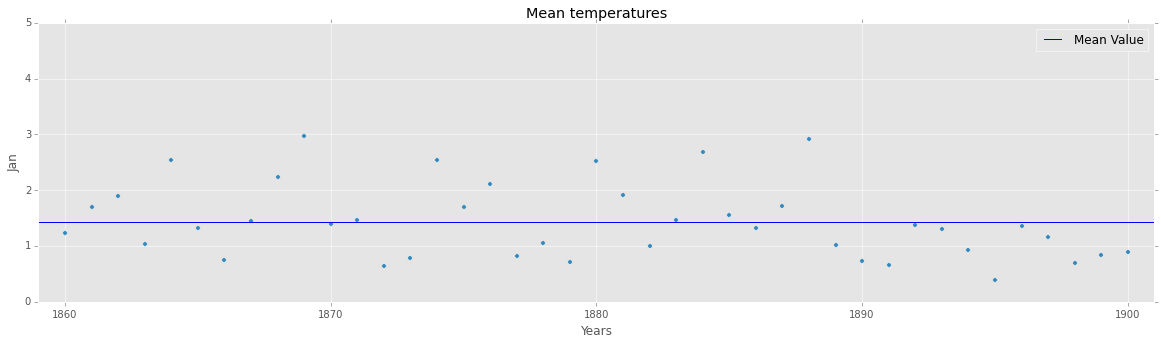

In [80]:
result = means_kriging_OP.plot(kind='scatter', x='year', y='jan', figsize=(20, 5), title='Mean temperatures')

plt.axhline(means_kriging_OP['jan'].mean(), label = 'Mean Value')

result.set_ylim([0,5])

result.set_xlim([1859, 1901])

result.xaxis.grid(True, which="minor")

result.set_xlabel("Years")

result.set_ylabel("Jan")

plt.legend()

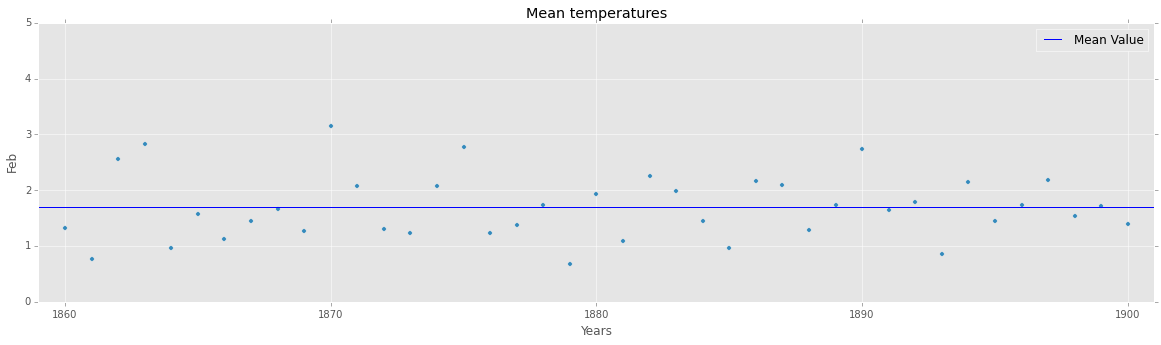

In [81]:
result = means_kriging_OP.plot(kind='scatter', x='year', y='feb', figsize=(20, 5), title='Mean temperatures')

plt.axhline(means_kriging_OP['feb'].mean(), label = 'Mean Value')

result.set_ylim([0,5])

result.set_xlim([1859, 1901])

result.xaxis.grid(True, which="minor")

result.set_xlabel("Years")

result.set_ylabel("Feb")

plt.legend()

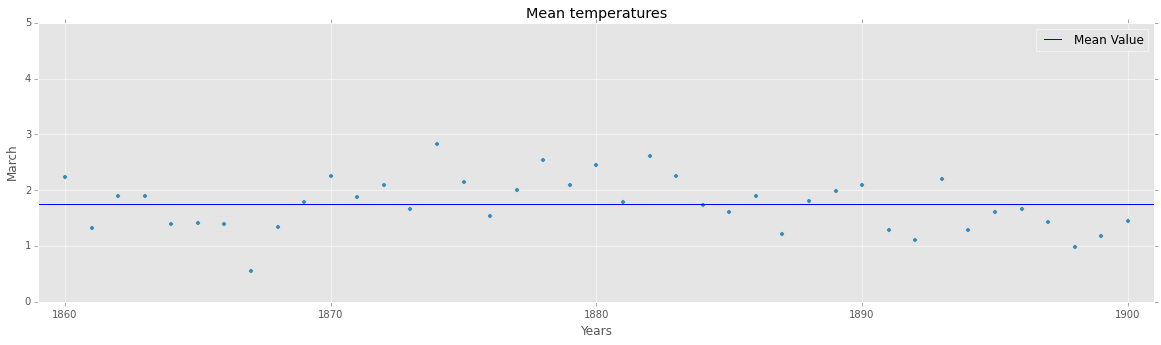

In [82]:
result = means_kriging_OP.plot(kind='scatter', x='year', y='mar', figsize=(20, 5), title='Mean temperatures')

plt.axhline(means_kriging_OP['mar'].mean(), label = 'Mean Value')

result.set_ylim([0,5])

result.set_xlim([1859, 1901])

result.xaxis.grid(True, which="minor")

result.set_xlabel("Years")

result.set_ylabel("March")

plt.legend()

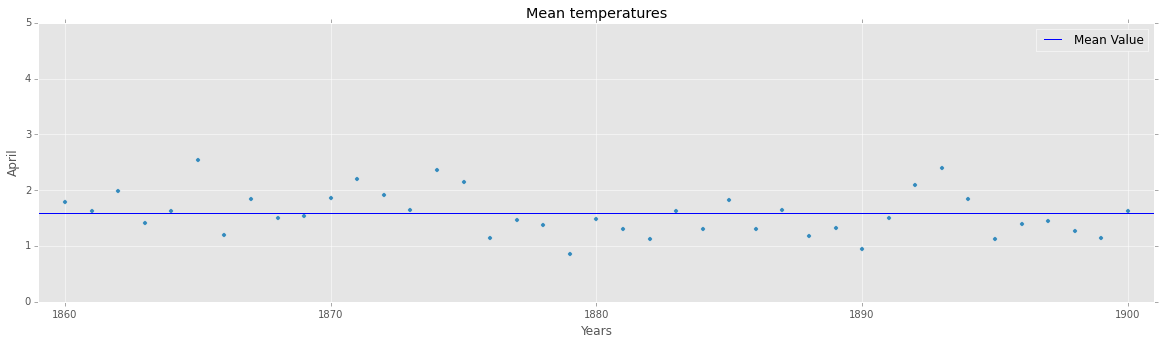

In [85]:
result = means_kriging_OP.plot(kind='scatter', x='year', y='apr', figsize=(20, 5), title='Mean temperatures')

plt.axhline(means_kriging_OP['apr'].mean(), label = 'Mean Value')

result.set_ylim([0,5])

result.set_xlim([1859, 1901])

result.xaxis.grid(True, which="minor")

result.set_xlabel("Years")

result.set_ylabel("April")

plt.legend()